In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('data_stocks.csv')

In [3]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
df.drop(['DATE'],axis=1,inplace=True)

In [5]:
df.shape

(41266, 501)

In [6]:
df.describe()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,43.291988,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,2.448582,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,37.460000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,41.690000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,43.650000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,44.935000,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,47.830000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [7]:
df.isnull().sum()

SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
NASDAQ.ADI     0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 501, dtype: int64

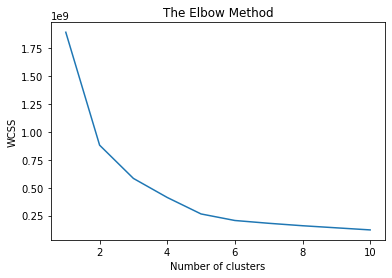

In [8]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
from kneed import KneeLocator
knee=KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [20]:
knee.knee

3

Here we see that the number of clusters are 3

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

In [13]:
df[y_kmeans==0]

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.520,38.99,...,84.370,119.035,44.400,39.880,82.030,7.360,50.22,63.8600,122.000,53.350
1,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.480,39.01,...,84.370,119.035,44.110,39.880,82.030,7.380,50.22,63.7400,121.770,53.350
2,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.930,38.91,...,84.585,119.260,44.090,39.980,82.020,7.360,50.12,63.7500,121.700,53.365
3,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.440,38.84,...,84.460,119.260,44.250,39.990,82.020,7.350,50.16,63.8800,121.700,53.380
4,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.600,38.93,...,84.470,119.610,44.110,39.960,82.030,7.360,50.20,63.9100,121.695,53.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,2387.8000,44.0100,143.7000,133.2700,77.790,105.0800,90.5000,59.700,126.785,41.32,...,95.900,116.680,45.120,42.915,81.145,7.110,51.60,65.9400,118.250,56.440
7034,2387.6499,44.0600,143.7000,133.3200,77.790,105.0700,90.5200,59.695,126.840,41.31,...,95.805,116.715,45.120,42.880,81.200,7.110,51.59,65.9450,118.190,56.420
7035,2388.4900,43.9600,143.5699,133.3500,77.770,105.0700,90.4900,59.690,127.010,41.30,...,95.830,116.710,45.090,42.875,81.205,7.115,51.58,65.9475,118.225,56.430
7036,2388.9900,43.9750,143.6600,133.3700,77.800,105.1400,90.5400,59.695,126.820,41.31,...,95.860,116.610,45.130,42.915,81.205,7.110,51.61,65.9850,118.240,56.475


In [14]:
df[y_kmeans==1]

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
21513,2439.0400,48.4400,145.22,146.0500,79.3300,102.700,105.360,48.5722,119.670,43.455,...,102.6900,93.05,47.700,44.280,81.910,28.0300,53.380,74.01,127.81,63.2250
21514,2439.0400,48.4352,145.22,145.8643,79.5999,102.780,105.590,48.6200,119.870,43.470,...,102.8000,93.14,47.680,44.280,81.920,28.0700,53.660,74.07,127.77,63.1750
21515,2438.3899,48.3700,145.08,145.7400,79.6700,102.770,105.455,48.6250,119.930,43.500,...,102.8099,92.98,47.650,44.170,81.920,28.0728,53.680,74.08,127.56,63.1650
21516,2438.4600,48.3400,145.07,145.5500,79.6984,102.820,105.475,48.6600,119.600,43.420,...,102.8300,92.99,47.670,44.190,81.930,28.1000,53.690,74.00,127.79,63.1100
21517,2438.0200,48.3300,145.02,145.5900,79.6300,102.820,105.605,48.6500,119.930,43.500,...,102.9300,93.00,47.650,44.180,81.900,28.1200,53.740,74.03,127.51,63.1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41261,2472.2200,44.7200,164.11,155.0900,83.6700,106.565,114.490,47.1500,142.425,45.130,...,99.6750,99.53,49.485,40.955,76.360,32.2850,62.110,76.88,114.31,62.7250
41262,2471.7700,44.7300,164.12,155.1600,83.6500,106.590,114.520,47.1500,142.450,45.130,...,99.7300,99.63,49.480,40.960,76.370,32.2950,62.100,76.90,114.33,62.7100
41263,2470.0300,44.7400,164.01,155.0650,83.6200,106.520,114.470,47.1500,142.330,45.135,...,99.7350,99.64,49.495,40.940,76.315,32.2900,62.090,76.88,114.31,62.6850
41264,2471.4900,44.7100,163.88,154.9600,83.5800,106.400,114.330,47.1350,142.170,45.065,...,99.7000,99.63,49.485,40.925,76.300,32.2750,62.075,76.83,114.23,62.6301


In [15]:
df[y_kmeans==2]

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
7038,2390.9600,44.0200,144.00,133.3900,77.950,105.18,90.770,59.7500,127.7900,41.2000,...,95.550,116.6600,45.140,42.91,82.450,7.130,51.66,65.80,117.7500,56.450
7039,2390.8401,43.9300,143.82,133.4800,77.755,104.88,90.570,59.7800,127.7300,41.2500,...,95.335,117.7400,45.160,42.82,82.320,7.120,51.63,65.73,118.0700,56.450
7040,2390.5100,43.5500,143.64,133.3100,77.730,104.81,90.700,59.7600,127.6400,41.3000,...,95.460,117.0000,45.120,42.74,82.266,7.130,51.63,65.58,117.4500,56.520
7041,2389.8701,43.3900,143.78,133.2700,77.685,104.62,90.450,59.7200,127.8150,41.2600,...,95.190,116.7800,45.130,42.78,82.240,7.125,51.48,65.70,117.8050,56.580
7042,2389.8000,43.2200,143.81,133.2900,77.640,104.71,90.380,59.7000,128.3500,41.1300,...,95.340,116.7300,45.120,42.80,82.100,7.100,51.48,65.71,117.6800,56.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21509,2439.1699,48.3000,145.26,146.0310,79.350,102.77,105.970,48.4401,119.2760,43.4100,...,102.890,93.0500,47.725,44.30,81.750,28.200,53.37,74.10,127.3600,63.120
21510,2438.2500,48.1705,145.32,146.0892,79.475,102.66,105.879,48.5000,119.7175,43.3500,...,102.720,93.2352,47.680,44.28,81.810,28.140,53.30,74.02,127.6400,63.085
21511,2437.8701,48.3800,145.25,145.6408,79.350,102.69,105.450,48.5300,120.1000,43.3799,...,102.670,92.9100,47.740,44.28,81.700,28.060,53.38,73.98,127.7500,63.265
21512,2438.7200,48.3000,145.10,145.9900,79.390,102.75,105.500,48.5500,119.5750,43.3700,...,102.590,93.0500,47.710,44.25,81.920,28.100,53.38,74.02,127.7500,63.245
